In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('cardio_vascular_disease.csv',sep=';')

In [3]:
data.shape

(70000, 13)

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data['age']=(data['age']/365).round().astype('int')

In [6]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int32
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int32(1), int64(11)
memory usage: 6.7 MB


In [8]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003050,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003050,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,0.003502,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


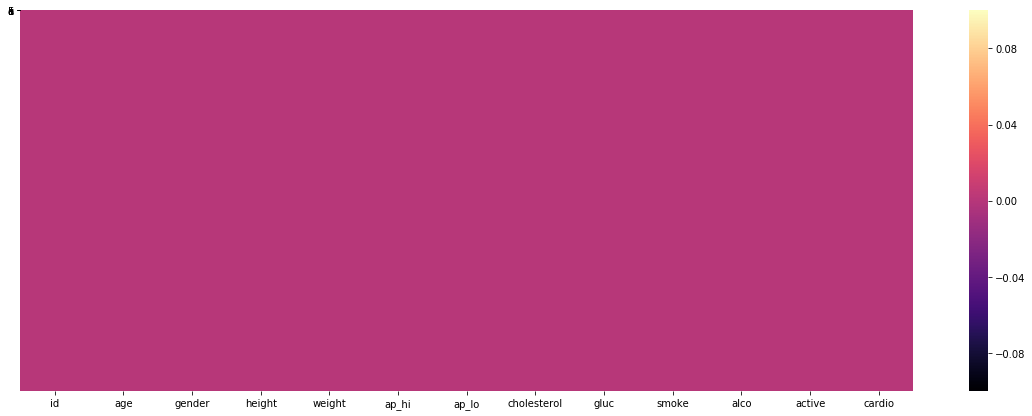

In [10]:
plt.figure(figsize=(20,7))
sns.heatmap(data.isnull(),cbar="False",cmap='magma',yticklabels='False')

In [11]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [12]:
data.drop('id',inplace=True,axis=1)

In [13]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [14]:
data["BMI"]=data['weight']/data['height']

In [15]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,0.369048
1,55,1,156,85.0,140,90,3,1,0,0,1,1,0.544872
2,52,1,165,64.0,130,70,3,1,0,0,0,1,0.387879
3,48,2,169,82.0,150,100,1,1,0,0,1,1,0.485207
4,48,1,156,56.0,100,60,1,1,0,0,0,0,0.358974


In [16]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
age,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749,0.077456
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.022238
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,0.005045
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.951775
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.030228
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.043013
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.158051
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.114074
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.018214
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.042544


In [17]:
data.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI'],
      dtype='object')

In [93]:
X=data.drop('cardio',axis=1)

In [94]:
y=data['cardio']

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
model=DecisionTreeClassifier()

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [99]:
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [100]:
ypreds=model.predict(X_test)

In [101]:
from sklearn.metrics import classification_report,confusion_matrix

In [102]:
print(classification_report(y_test,ypreds))
print('\n')
print(confusion_matrix(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65     10600
           1       0.64      0.63      0.63     10400

    accuracy                           0.64     21000
   macro avg       0.64      0.64      0.64     21000
weighted avg       0.64      0.64      0.64     21000



[[6975 3625]
 [3899 6501]]


In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
modelR=RandomForestClassifier()

In [32]:
modelR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
ypreds=modelR.predict(X_test)

In [36]:
print(classification_report(y_test,ypreds))
print(confusion_matrix(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70     10524
           1       0.70      0.65      0.68     10476

    accuracy                           0.69     21000
   macro avg       0.69      0.69      0.69     21000
weighted avg       0.69      0.69      0.69     21000

[[7652 2872]
 [3625 6851]]


In [37]:
from sklearn.model_selection import GridSearchCV

In [44]:
parameters_optimization={'criterion':('gini','entropy'),'max_depth':(1,2,4,5,6,7),
                       'max_features':(1,2,3,4,5,6),'max_leaf_nodes':(2,3,4,5,6)}

In [45]:
decision_gridsearch=GridSearchCV(DecisionTreeClassifier(),parameters_optimization)

In [46]:
decision_gridsearch.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': (1, 2, 4, 5, 6, 7),
              

In [47]:
decision_gridsearch.best_index_

89

In [48]:
decision_gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 6, 'max_leaf_nodes': 6}

In [50]:
ypreds=decision_gridsearch.predict(X_test)

In [51]:
print(classification_report(y_test,ypreds))
print(confusion_matrix(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73     10524
           1       0.75      0.56      0.65     10476

    accuracy                           0.69     21000
   macro avg       0.70      0.69      0.69     21000
weighted avg       0.70      0.69      0.69     21000

[[8604 1920]
 [4564 5912]]


In [52]:
data.shape

(70000, 13)

In [65]:
randomforest_gridcv=GridSearchCV(RandomForestClassifier(),parameter_optimizationR)

In [66]:
parameter_optimizationR={'criterion':('gini','entropy'),
                       'max_depth':(1,2,3,4,5,6), 'max_features':('auto','log2'),'n_estimators':(10,20,30,50,70)}

In [67]:
randomforest_gridcv.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [68]:
randomforest_gridcv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 30}

In [70]:
ypreds=randomforest_gridcv.predict(X_test)

In [71]:
print(classification_report(y_test,ypreds))
print(confusion_matrix(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.70      0.80      0.75     10524
           1       0.76      0.66      0.71     10476

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

[[8407 2117]
 [3595 6881]]


In [72]:
data.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
age,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749,0.077456
gender,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,0.022238
height,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,0.005045
weight,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.951775
ap_hi,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.030228
ap_lo,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.043013
cholesterol,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.158051
gluc,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.114074
smoke,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,0.018214
alco,-0.029918,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,0.042544


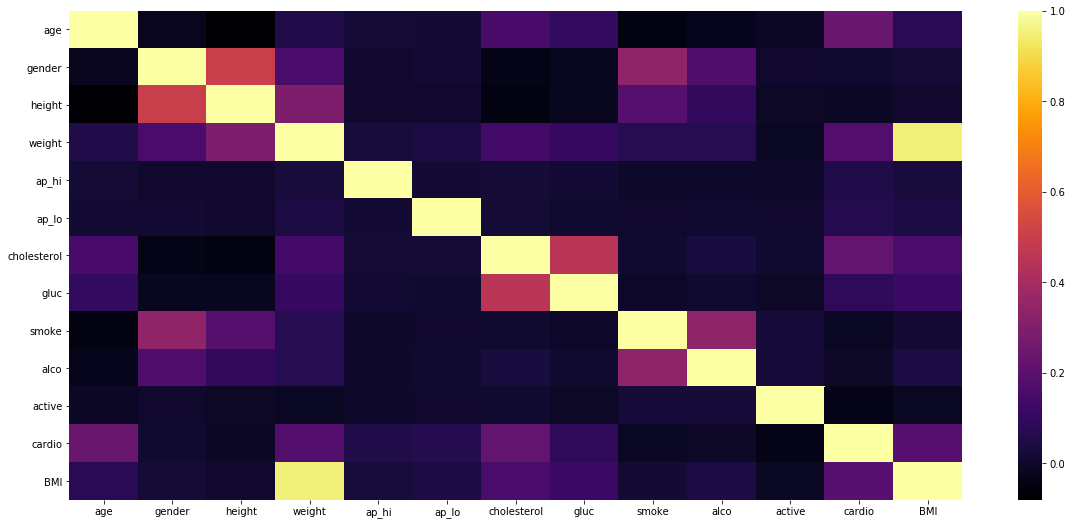

In [78]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(),cmap='inferno')

In [103]:
randomforest_gridcv.best_score_

0.7332857142857143

In [104]:
randomforest_gridcv.cv

'warn'

In [105]:
randomforest_gridcv.error_score

'raise-deprecating'

In [106]:
randomforest_gridcv.param_grid

{'criterion': ('gini', 'entropy'),
 'max_depth': (1, 2, 3, 4, 5, 6),
 'max_features': ('auto', 'log2'),
 'n_estimators': (10, 20, 30, 50, 70)}

In [107]:
randomforest_gridcv.verbose

0